In [72]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [23]:
label_df=pd.read_csv("D:/vit_vellore/sem2/cifar_dataset/trainLabels.csv")
print(label_df.head())
print(label_df.shape)

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
(50000, 2)


In [24]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [25]:
train_path="D:/vit_vellore/sem2/cifar_dataset/train"
test_path="D:/vit_vellore/sem2/cifar_dataset/test"

In [42]:
x_list=[] 
y_list=[]
for idx, row in label_df.iterrows():
    address=f"{row['id']}.png"
    label_str=row['label']
    if label_str in classes:
        label_index=classes.index(label_str)
    image_path=os.path.join(train_path, address)
    image=cv2.imread(image_path)
    image=cv2.resize(image, (32,32))
    image=image.astype('float32')/255
    x_list.append(image)
    y_list.append(label_index)

In [43]:
x=np.array(x_list)
y=np.array(y_list)
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [44]:
y_encoded=LabelEncoder().fit_transform(y)
y_hot_encoded=to_categorical(y_encoded, num_classes=10)
print(f"Original Label: {y[0]}")
print(f"Encoded Label: {y_encoded[0]}")
print(f"One-Hot encoded: {y_hot_encoded[0]}")

Original Label: 6
Encoded Label: 6
One-Hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [45]:
x_train, x_test, y_train, y_test=train_test_split(x, y_hot_encoded, test_size=0.2, random_state=42)
print(f"training size - {len(x_train)} images")
print(f"testing size - {len(x_test)} images")

training size - 40000 images
testing size - 10000 images


In [66]:
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,234 (1.21 MB)

 Trainable params: 315,978 (1.21 MB)

 Non-trainable params: 256 (1.00 KB)

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
stopping= EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [69]:
history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[stopping])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.2944 - loss: 2.0536 - val_accuracy: 0.4952 - val_loss: 1.4494
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.5037 - loss: 1.3983 - val_accuracy: 0.5350 - val_loss: 1.2827
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.5530 - loss: 1.2625 - val_accuracy: 0.5729 - val_loss: 1.1903
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.5888 - loss: 1.1731 - val_accuracy: 0.5970 - val_loss: 1.1273
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.6010 - loss: 1.1182 - val_accuracy: 0.6235 - val_loss: 1.0827
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.6299 - loss: 1.0592 - val_accuracy: 0.5058 - val_loss: 1.4208
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.6377 - loss: 1.0433 - val_accuracy: 0.6519 - val_loss: 1.0049
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.6501 - loss: 1.0111 - 

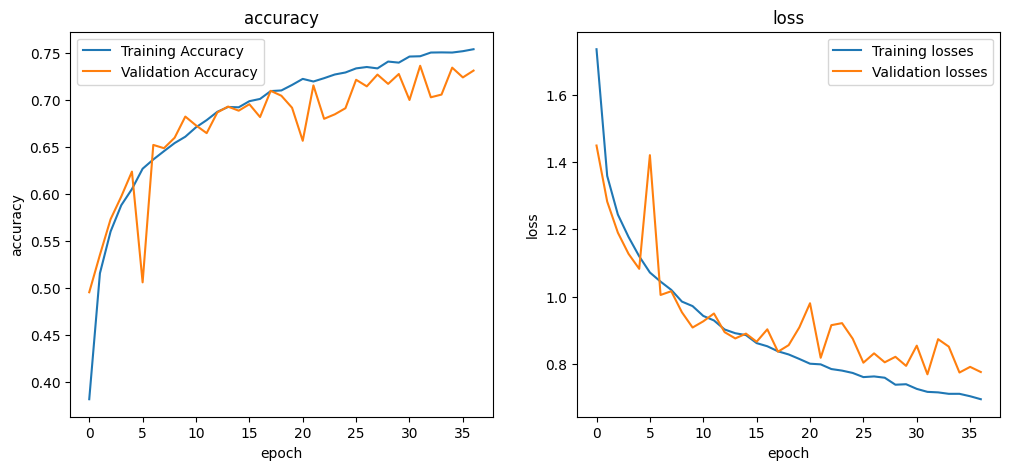

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training losses')
plt.plot(history.history['val_loss'], label='Validation losses')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [71]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(f"Test accuracy is {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7442 - loss: 0.7374
Test accuracy is 73.83%


In [73]:
y_pred=model.predict(x_test)
y_pred_class=np.argmax(y_pred, axis=1)
y_report=np.argmax(y_test, axis=1)
print(classification_report(y_report, y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       973
           1       0.89      0.82      0.85       979
           2       0.62      0.63      0.62      1030
           3       0.58      0.57      0.57      1023
           4       0.65      0.74      0.69       933
           5       0.67      0.61      0.64      1015
           6       0.77      0.84      0.81       996
           7       0.81      0.75      0.78       994
           8       0.79      0.88      0.83      1017
           9       0.82      0.84      0.83      1040

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

